Lets import the necessary libraries

In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score


lets add the dataset and change it a bit,
if you have lung cancer = 1, if you are male 1


In [239]:
df = pd.read_excel(r'C:\Users\Yusuf Ertuğrul\OneDrive\Belgeler\Visual_Studio_Projects\Lung_Cancer_Detection\survey lung cancer excel file.xlsx')
df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'YES':1,'NO':0})
df['GENDER'] = df['GENDER'].map({'M':1,'F':0})

print(df.columns)
df.columns = df.columns.str.strip()



Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')


maping shit

In [240]:
# Mapping for 'GENDER'

# Mapping for 'AGE' (no need to map since it's already numerical)

# Mapping for 'SMOKING'
df['SMOKING'] = df['SMOKING'].map({1: 0, 2: 1})

# Mapping for 'YELLOW_FINGERS'
df['YELLOW_FINGERS'] = df['YELLOW_FINGERS'].map({1: 0, 2: 1})

# Mapping for 'ANXIETY'
df['ANXIETY'] = df['ANXIETY'].map({1: 0, 2: 1})

# Mapping for 'PEER_PRESSURE'
df['PEER_PRESSURE'] = df['PEER_PRESSURE'].map({1: 0, 2: 1})

# Mapping for 'CHRONIC DISEASE'
df['CHRONIC DISEASE'] = df['CHRONIC DISEASE'].map({1: 0, 2: 1})

# Mapping for 'FATIGUE'
df['FATIGUE'] = df['FATIGUE'].map({1: 0, 2: 1})

# Mapping for 'ALLERGY'
df['ALLERGY'] = df['ALLERGY'].map({1: 0, 2: 1})

# Mapping for 'WHEEZING'
df['WHEEZING'] = df['WHEEZING'].map({1: 0, 2: 1})

# Mapping for 'ALCOHOL CONSUMING'
df['ALCOHOL CONSUMING'] = df['ALCOHOL CONSUMING'].map({1: 0, 2: 1})

# Mapping for 'COUGHING'
df['COUGHING'] = df['COUGHING'].map({1: 0, 2: 1})

# Mapping for 'SHORTNESS OF BREATH'
df['SHORTNESS OF BREATH'] = df['SHORTNESS OF BREATH'].map({1: 0, 2: 1})

# Mapping for 'SWALLOWING DIFFICULTY'
df['SWALLOWING DIFFICULTY'] = df['SWALLOWING DIFFICULTY'].map({1: 0, 2: 1})

# Mapping for 'CHEST PAIN'
df['CHEST PAIN'] = df['CHEST PAIN'].map({1: 0, 2: 1})

# Mapping for 'LUNG_CANCER' (no need to map since it's already numerical)


In [241]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


lets delete the unusable data if there is, in our case we dont have any

In [242]:


# Get the number of rows before dropping missing values
rows_before = df.shape[0]

# Drop rows with missing values
df.dropna(inplace=True)

# Get the number of rows after dropping missing values
rows_after = df.shape[0]

# Check if any rows were dropped
if rows_before != rows_after:
    print("Some rows were dropped due to missing values.")
else:
    print("No rows were dropped.")


No rows were dropped.


Lets Scale the data and compare the values before and after the scaling

In [243]:
scaler = StandardScaler()

# Drop any rows with missing values
df.dropna(inplace=True)
X = df.drop('LUNG_CANCER',axis=1)
y= df['LUNG_CANCER']

X_scaled = scaler.fit_transform(X)


Now that our data is ready, lets scalsplit it

In [244]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

Lets select our model and make some predictions

In [245]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred)*100,"%")
print(classification_report(y_test, y_pred))

Accuracy: 96.7741935483871 %
              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.98      0.99      0.98        86

    accuracy                           0.97        93
   macro avg       0.91      0.85      0.88        93
weighted avg       0.97      0.97      0.97        93



lets get some grafs

In [246]:

total_instances = len(df)
lung_cancer_instances = len(df[df['LUNG_CANCER'] == 1])
smoking_instances = len(df[df['SMOKING'] == 1])
lung_cancer_smoking_instances = len(df[(df['LUNG_CANCER'] == 1) & (df['SMOKING'] == 1)])

# Probabilities
P_lung_cancer_given_smoking = lung_cancer_smoking_instances / smoking_instances

# Print probabilities
print("Probability of having lung cancer given smoking:", P_lung_cancer_given_smoking *100,"%, accordint to this data")


Probability of having lung cancer given smoking: 89.08045977011494 %, accordint to this data


Getting User info

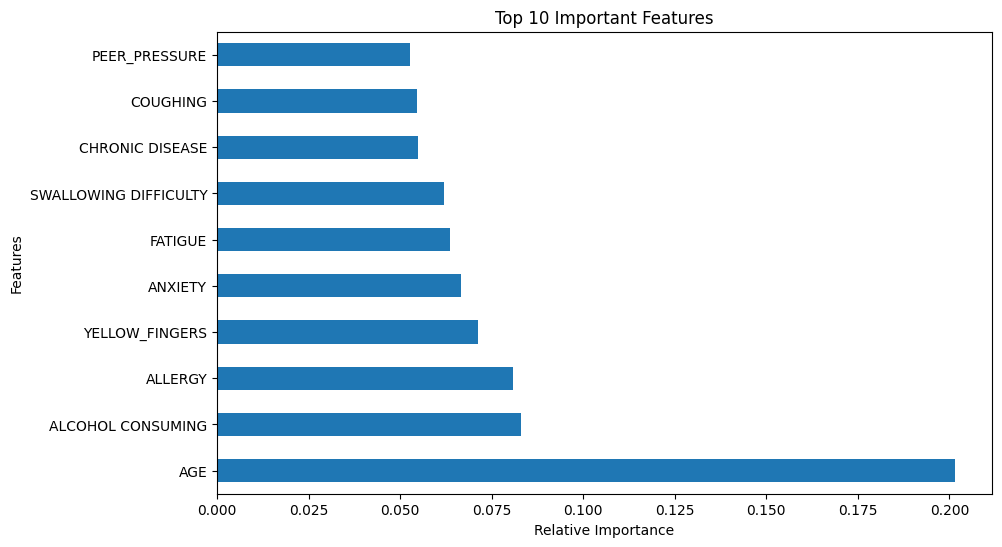

In [247]:
# Plot feature importance
plt.figure(figsize=(10, 6))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()


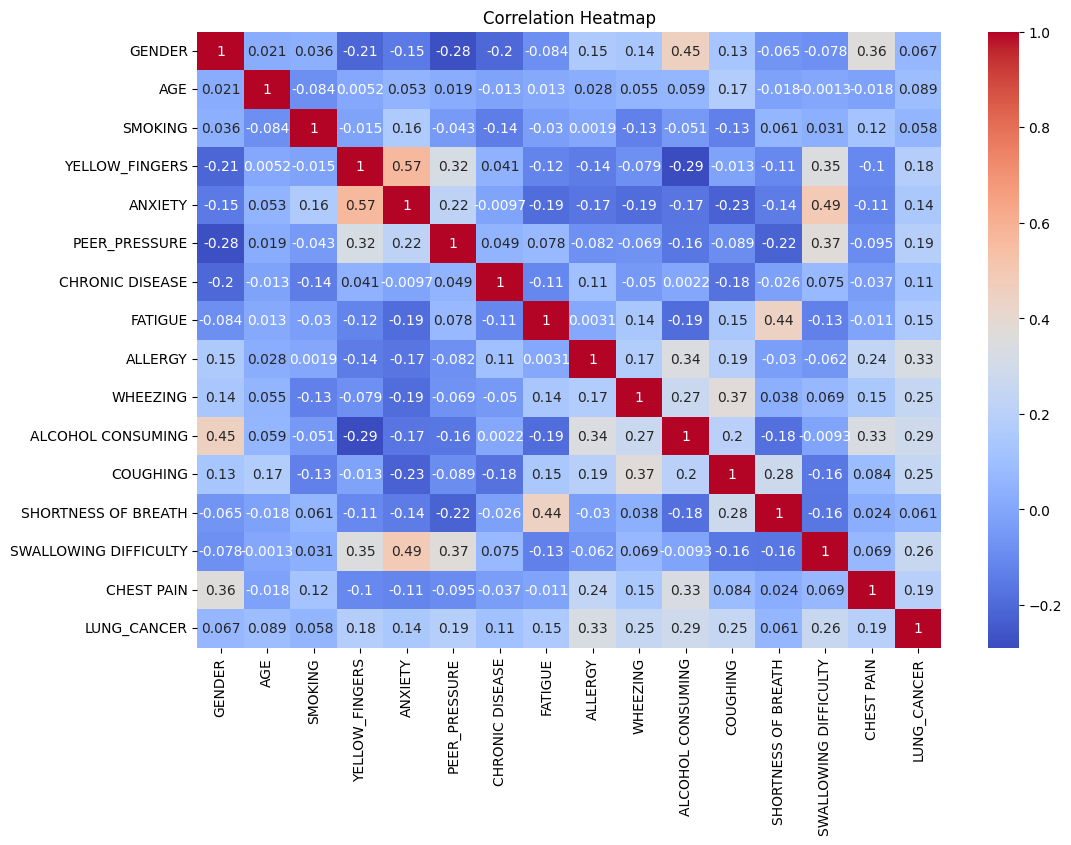

In [248]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [249]:

# # Distribution plots
# plt.figure(figsize=(12, 6))
# for feature in X.columns:
#     plt.subplot(2, 4, X.columns.get_loc(feature) + 1)
#     sns.histplot(df[df['LUNG_CANCER'] == 0][feature], color='blue', label='No Lung Cancer', kde=True)
#     sns.histplot(df[df['LUNG_CANCER'] == 1][feature], color='red', label='Lung Cancer', kde=True)
#     plt.xlabel(feature)
#     plt.ylabel('Frequency')
#     plt.legend()
# plt.tight_layout()
# plt.show()
# warnings.filterwarnings('ignore')



RandomForestClassifier()
